## 2.1.1 준비 : 파이썬으로 데이터 불러오기

### 1. 'kNN.py' 모듈 생성하기

In [206]:
# Numpy : 과학용 계산 패키지
from numpy import *
# operator : kNN 알고리즘에서 정렬 처리를 하기 위한 패키지
import operator

# 데이터의 집합과 분류 항목을 생성하는 함수
def createDataSet():
    group = array([[1.0,1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

위의 모듈을 kNN이라는 .py 파일로 저장하여 활용

> File -> Download as python(.py)

### 2. 'kNN.py'  의 모듈 불러오기 

In [207]:
import kNN

# 동일한 데이터 집합을 보도록 만들기 위해 crateDataSet 함수를 생성함
group, labels = kNN.createDataSet()

In [208]:
labels

['A', 'A', 'B', 'B']

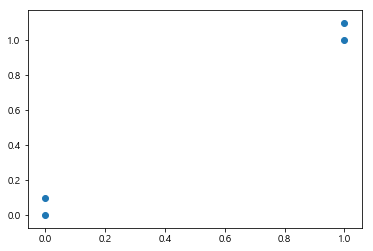

In [202]:
import matplotlib.pylab as plt

plt.scatter(x = group[:,0], y = group[:,1])
plt.show()

## 2.1.2 준비 : kNN 분류 알고리즘 실행하기

In [210]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [214]:
classify0([0,0], group, labels, 3)

'B'

## 2.2 예제: kNN을 이용하여 데이트 사이트의 만남 주선 개선하기                

### 2.2.1 준비 : 텍스트 파일의 데이터 구문 분석하기

In [205]:
import pandas as pd
data = pd.read_table('https://raw.githubusercontent.com/samridh90/Machine-learning-in-action/master/kNN/datingTestSet.txt', header = None)
data.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


> 연간 항공 마일리지 수

> 비디오 게임으로 보내는 시간의 비율

> 주당 아이스크림 소비량(리터)

#### 리스팅 2.2 Numpy 구문 분석 코드에 텍스트 기록하기

In [122]:
def file2matrix(filename):
    fr = open(filename)
    #Get number of lines in file : 파일의 줄 수 구하기
    numberOfLines = len(fr.readlines())
    #prepare Numpy matrix to return,  hardcoded at the  moment to various input
    returnMat = zeros((numberOfLines,3)) #   크기가 " 라인 수 x 3 " 인 Numpy 행렬 생성
    #prepare labels return
    classLabelVector = []
    fr = open(filename)
    index = 0
    #Parse line to a list
    for line in fr.readlines(): # 파일 내부의 모든 줄 반복 수행
        line = line.strip() #  문자열 양 끝에 있는 공백 제거
        listFromLine = line.split('\t') # 구분 문자로 구별되는 요소들로 구성된 하나의 리스트로 각 줄을 분할
        returnMat[index,:] = listFromLine[0:3] # 처음 세 개의 요소를 분할하여 우리가 만든 행렬에 저장
        #use pythons feature of negative indexing to get the last item from list to put into classLabelVector
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat,classLabelVector

#### 'datingTestSet.txt' 불러오기

In [175]:
datingDataMat , datingLabels = file2matrix('datingTestSet.txt')
datingDataMat2 , datingLabels2 = file2matrix('datingTestSet2.txt')

In [140]:
datingDataMat[]

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [127]:
datingLabels[0:15]

['largeDoses',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike']

> **Numpy 배열 vs 파이썬 배열**

> **from numpy import array** : Numpy 배열 불러오거나, Numpy의 전체를 불러옴으로써 Numpy 배열을 불러올 수 있다.

>배열에는 파이썬이 가지고 있는 다른 유형도 있으니 여기서는 사용하지 않음. 모든 Numpy 배열 메소드는 다른 배열에서 작동하지 않기 때문에 다른 배열을 불러오는 실수를 범하지 않도록 주의해야 함

### 2.2.2 분석 : matplot 라이브러리로 scatter plot 생성

"비디오 게임으로 보내는 시간의 비율" 과 "주당 아이스크림 소비량(리터)"  로 산점도 그림

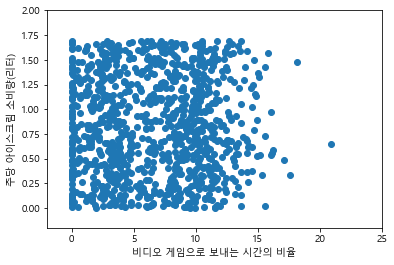

In [165]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
ax.axis([-2,25,-0.2,2.0])
plt.xlabel('비디오 게임으로 보내는 시간의 비율')
plt.ylabel('주당 아이스크림 소비량(리터)')
plt.show()

위의 데이터로는 어떠한 패턴도 알아보기 어려움

But 

분류 항목 값이라는 아직 사용하지 않은 추가적인 데이터를 가지고 있으므로 그것을 색상이나 다른 어던 기호로 좌표에 표현해보자

In [176]:
from numpy import array
import matplotlib
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(datingDataMat2[:,1], datingDataMat2[:,2], 15.0*array(datingLabels2), 15.0*array(datingLabels2))

ax.axis([-2,25,-0.2,2.0])
plt.xlabel('비디오 게임으로 보내는 시간의 비율')
plt.ylabel('주당 아이스크림 소비량(리터)')
plt.show()

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

### 2.2.3 준비: 수치형 값 정규화하기

서로 다른 범위에 놓여있는 값을 다룰 경우에는 이들을 정규화하는 것이 일반적임

> **0 ~ 1** 
: newValue = (oldValue - min) / (max - min)
>
> **-1 ~ +1**
>

#### 리스팅 2.3 데이터 정규화하기 코드

In [186]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide : 구성요소 현명하게 나누기
    return normDataSet, ranges, minVals

In [215]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [216]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

### 2,2,4 검사 : 저체 프로그램으로 분류기 검사하기

#### 리스팅 2.4 데이트하기 사이트를 위한 분류기 검사 코드

In [199]:
def datingClassTest():
    #hold out 10%
    hoRatio = 0.10  
    #load data setfrom file
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %s, the real answer is: %s" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [200]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

#### 2,2,5 사용 : 모두에게 유용한 시스템 만들기

#### 리스팅 2.5 데이트하기 사이트 예측기 함수

In [197]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(input(\
                                  "percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = int(classify0((inArr-\
                                   minVals)/ranges,normMat,datingLabels,3))
    print ("You will probably like this person: ",\
           resultList[classifierResult-1])

In [198]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5


ValueError: invalid literal for int() with base 10: 'smallDoses'